In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("owl-with-odds.csv")

In [3]:
#We need to do a tiny bit of cleaning.  Remove t1_odds and t2_odds NaN's and then convert to numeric.
#It isn't a concern that we do this early, because without odds the row cannot be put through the evaluator,
#so it is of no good to us.
subset = ['t1_odds', 't2_odds']
print(len(df))
df.dropna(subset=subset ,inplace=True)
print(len(df))

df['t1_odds'] = pd.to_numeric(df['t1_odds'], errors='coerce')
df['t2_odds'] = pd.to_numeric(df['t2_odds'], errors='coerce')
df.dropna(subset=subset ,inplace=True)
print(len(df))

651
538
536


In [4]:
#1. Split

#2. Create a simple model

#3. Create custom evaluator

#4. Create custom cross-validation

In [5]:
df_train = df[:-60]

In [6]:
df_test = df[-60:]

In [7]:
print(len(df_test))
print(len(df_train))


60
476


In [8]:
df_test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'team_one', 'team_two', 'stage',
       'winner', 'date', 'corona_virus_isolation', 't1_wins_season',
       't1_losses_season', 't2_wins_season', 't2_losses_season',
       't1_matches_season', 't2_matches_season', 't1_win_percent_season',
       't2_win_percent_season', 't1_wins_alltime', 't1_losses_alltime',
       't2_wins_alltime', 't2_losses_alltime', 't1_matches_alltime',
       't2_matches_alltime', 't1_win_percent_alltime',
       't2_win_percent_alltime', 't1_wins_last_3', 't1_losses_last_3',
       't2_wins_last_3', 't2_losses_last_3', 't1_win_percent_last_3',
       't2_win_percent_last_3', 't1_wins_last_5', 't1_losses_last_5',
       't2_wins_last_5', 't2_losses_last_5', 't1_win_percent_last_5',
       't2_win_percent_last_5', 't1_wins_last_10', 't1_losses_last_10',
       't2_wins_last_10', 't2_losses_last_10', 't1_win_percent_last_10',
       't2_win_percent_last_10', 't1_wins_last_20', 't1_losses_last_20',
       't2_wins_last_

In [9]:
#I want features to be inclusive to start....
features = ['corona_virus_isolation', 't1_wins_season',
       't1_losses_season', 't2_wins_season', 't2_losses_season',
       't1_matches_season', 't2_matches_season', 't1_win_percent_season',
       't2_win_percent_season', 't1_wins_alltime', 't1_losses_alltime',
       't2_wins_alltime', 't2_losses_alltime', 't1_matches_alltime',
       't2_matches_alltime', 't1_win_percent_alltime',
       't2_win_percent_alltime', 't1_wins_last_3', 't1_losses_last_3',
       't2_wins_last_3', 't2_losses_last_3', 't1_win_percent_last_3',
       't2_win_percent_last_3', 't1_wins_last_5', 't1_losses_last_5',
       't2_wins_last_5', 't2_losses_last_5', 't1_win_percent_last_5',
       't2_win_percent_last_5', 't1_wins_last_10', 't1_losses_last_10',
       't2_wins_last_10', 't2_losses_last_10', 't1_win_percent_last_10',
       't2_win_percent_last_10', 
        't1_wins_vs_t2', 't1_losses_vs_t2',
       't1_matches_vs_t2', 't1_odds', 't2_odds', 'winner_label']


In [10]:
df_test_filtered = df_test[features]
df_train_filtered = df_train[features]

In [11]:
df_test_filtered.dtypes

corona_virus_isolation       bool
t1_wins_season            float64
t1_losses_season          float64
t2_wins_season            float64
t2_losses_season          float64
t1_matches_season         float64
t2_matches_season         float64
t1_win_percent_season     float64
t2_win_percent_season     float64
t1_wins_alltime           float64
t1_losses_alltime         float64
t2_wins_alltime           float64
t2_losses_alltime         float64
t1_matches_alltime        float64
t2_matches_alltime        float64
t1_win_percent_alltime    float64
t2_win_percent_alltime    float64
t1_wins_last_3            float64
t1_losses_last_3          float64
t2_wins_last_3            float64
t2_losses_last_3          float64
t1_win_percent_last_3     float64
t2_win_percent_last_3     float64
t1_wins_last_5            float64
t1_losses_last_5          float64
t2_wins_last_5            float64
t2_losses_last_5          float64
t1_win_percent_last_5     float64
t2_win_percent_last_5     float64
t1_wins_last_1

In [12]:
df_train_filtered.to_csv('test.csv')

In [13]:
missing=(df_train_filtered.isnull().sum() / len(df_train_filtered)) *100
missing=missing.drop(missing[missing==0].index).sort_values(ascending=False)
missing=pd.DataFrame({'Missing Ratio' :missing})
missing.head(40)

,Missing Ratio
t2_win_percent_last_10,16.386555
t2_losses_last_10,16.386555
t2_wins_last_10,16.386555
t1_losses_last_10,15.126050
t1_wins_last_10,15.126050
t1_win_percent_last_10,15.126050
t2_losses_last_5,8.823529
t2_wins_last_5,8.823529
t2_win_percent_last_5,8.823529
t1_win_percent_last_5,7.142857


In [14]:
df_test_filtered.dropna(inplace=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_test_filtered.shape

(60, 41)

In [16]:
df_train_filtered.dropna(inplace=True)
df_train_filtered.shape

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(379, 41)

In [17]:
X = df_train_filtered.copy()

In [18]:
X_validation = df_test_filtered.copy()

In [19]:
y = X['winner_label']

In [20]:
y_validation = X_validation['winner_label']

In [21]:
X = X.drop('winner_label', axis=1)
X_validation = X_validation.drop('winner_label', axis=1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(284, 40)
(95, 40)
(284,)
(95,)


In [102]:
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [103]:
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
preds = model.predict(X_test)


In [109]:
#Let's add the predictions to the dataframe....
#We need to add the winner too

X_odds = X_test[['t1_odds', 't2_odds']]
df_with_probs = np.append(X_odds, probs, 1)

y_test_reshaped = y_test.values.reshape(len(y_test),1)

df_with_winner = np.append(df_with_probs, y_test_reshaped, 1)
print(y_test_reshaped.shape)
print(df_with_probs.shape)

(95, 1)
(95, 4)


In [118]:
temp_df = pd.DataFrame(df_with_winner, columns=['t1_odds', 't2_odds', 't1_prob', 't2_prob', 'winner'])
display(temp_df)
temp_df.to_csv('ev_test.csv')

,t1_odds,t2_odds,t1_prob,t2_prob,winner
0,459.0,-833.0,0.285714,0.714286,1.0
1,-110.0,-110.0,0.500000,0.500000,0.0
2,-385.0,299.0,0.416667,0.583333,1.0
3,-137.0,112.0,0.416667,0.583333,0.0
4,-139.0,106.0,0.779412,0.220588,1.0
...,...,...,...,...,...
90,135.0,-179.0,0.176471,0.823529,1.0
91,-323.0,252.0,0.779412,0.220588,0.0
92,-227.0,170.0,0.779412,0.220588,0.0
93,-141.0,106.0,0.833333,0.166667,1.0


In [71]:
preds

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [72]:
columns=list(X.columns)
dot_data = tree.export_graphviz(model,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image1",view=True)

'image1.pdf'

Confusion matrix
[[31 15]
 [22 27]]


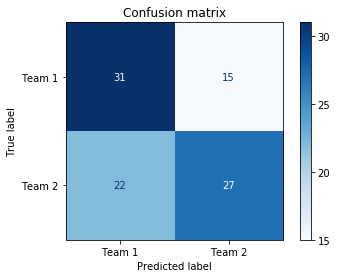

tp for total: 31
tn: 27
fp: 22
fn: 15
The precision is: 0.5849056603773585
The accuracy is 0.6105263157894737
The prevalence of blue is 0.4842105263157895
The true_positive rate for total is 0.6739130434782609


In [75]:
%matplotlib inline

class_names = ['Team 1', 'Team 2']

titles_options= [(f"Total Confusion matrix", None),
                 ("Normalized confusion matrix", 'true')]

title = f"Confusion matrix"
normalize=None


disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize,
                             values_format='.5g'
                             )
disp.ax_.set_title(title)
plt.rcParams.update({'font.size': 16})
print(title)
print(disp.confusion_matrix)
plt.grid(False)
plt.show()    

cm = confusion_matrix(preds, y_test)
tp = cm[0][0] 
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
total = tp + tn + fp + fn
print(f"tp for total: {tp}")
print(f"tn: {tn}")
print(f"fp: {fp}")
print(f"fn: {fn}")
accuracy = (tp + tn) / total
precision = tp / (tp + fp)

true_positive = tp / (tp + fn)
print(f"The precision is: {precision}")
print(f"The accuracy is {accuracy}")
print(f"The prevalence of blue is {(tp + fn) / total}")
print(f"The true_positive rate for total is {true_positive}")

In [ ]:
def get